# TP IA — Clustering (Iris) — Corrigé

Ce notebook propose une solution guidée pour le TP de clustering sur le dataset **Iris**.
Objectifs :
- Chargement et exploration rapide
- Visualisation 2D via **PCA**
- Clustering avec **K-Means** et **DBSCAN**
- Comparaison et discussion

> Remarque : Les graphes utilisent **matplotlib** uniquement.


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Réglages d'affichage
pd.set_option('display.max_columns', None)


## 1) Chargement & exploration

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")  # non utilisé pour l'entraînement non supervisé

X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X.shape, X.describe()


((150, 4),
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
 count         150.000000        150.000000         150.000000   
 mean            5.843333          3.057333           3.758000   
 std             0.828066          0.435866           1.765298   
 min             4.300000          2.000000           1.000000   
 25%             5.100000          2.800000           1.600000   
 50%             5.800000          3.000000           4.350000   
 75%             6.400000          3.300000           5.100000   
 max             7.900000          4.400000           6.900000   
 
        petal width (cm)  
 count        150.000000  
 mean           1.199333  
 std            0.762238  
 min            0.100000  
 25%            0.300000  
 50%            1.300000  
 75%            1.800000  
 max            2.500000  )

## 2) PCA (2 composantes) et visualisation

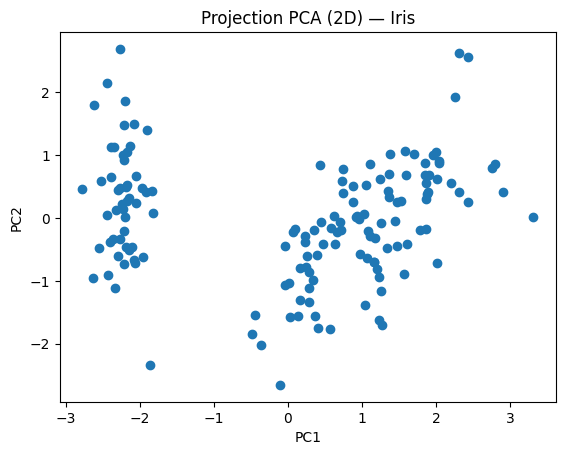

array([0.72962445, 0.22850762])

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Projection PCA (2D) — Iris")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

explained = pca.explained_variance_ratio_
explained


## 3) K-Means (k=3)

In [5]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
kmeans.fit(X_scaled)
labels_km = kmeans.labels_

# Silhouette score sur les données standardisées (ou originales)
sil_km = silhouette_score(X_scaled, labels_km)
sil_km


0.4798814508199817

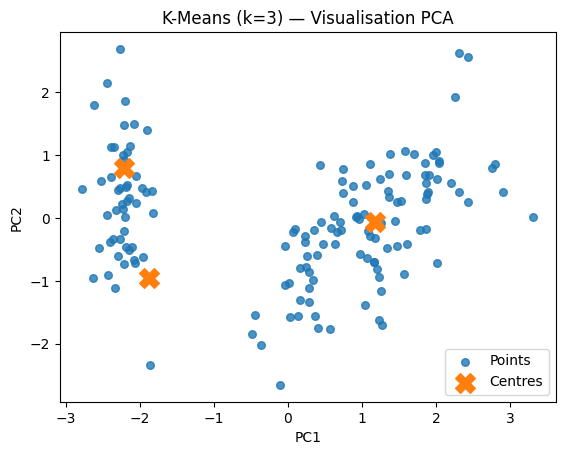

In [6]:
# Visualisation dans l'espace PCA
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=30, alpha=0.8, label="Points")
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], marker="X", s=200, label="Centres")
plt.title("K-Means (k=3) — Visualisation PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


## 4) DBSCAN

In [7]:
# Essayez différents eps si nécessaire
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(X_scaled)
labels_db = dbscan.labels_

# Nombre de clusters (hors bruit -1)
n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
prop_noise = (labels_db == -1).mean()

n_clusters_db, prop_noise


(2, np.float64(0.17333333333333334))

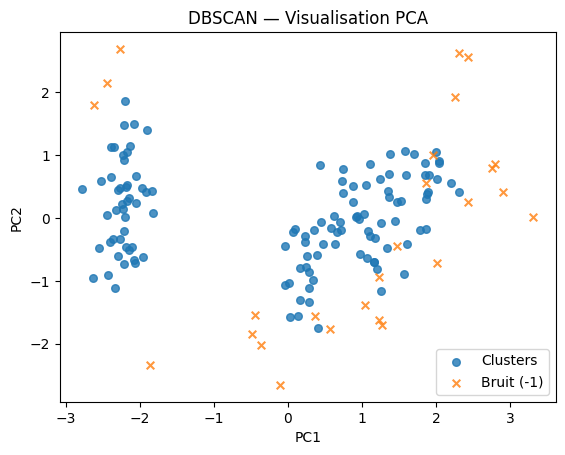

In [8]:
# Visualisation dans l'espace PCA (bruit = étiquette -1)
plt.figure()
mask_core = labels_db != -1
plt.scatter(X_pca[mask_core, 0], X_pca[mask_core, 1], s=30, alpha=0.8, label="Clusters")
plt.scatter(X_pca[~mask_core, 0], X_pca[~mask_core, 1], s=30, alpha=0.8, marker="x", label="Bruit (-1)")
plt.title("DBSCAN — Visualisation PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


## 5) Discussion rapide

- **K-Means** suppose des clusters convexes et de taille similaire ; nécessite de choisir **k**.
- **DBSCAN** détecte des formes arbitraires et identifie le **bruit**, mais il faut régler `eps` et `min_samples`.
- La **standardisation** aide particulièrement DBSCAN (distance basée sur l'échelle des variables).
- Sur Iris, K-Means avec `k=3` donne souvent un **silhouette score** raisonnable et une séparation visuelle correcte dans l'espace PCA.
